In [101]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [102]:
mu=pd.read_csv('mushroom.csv')
mu.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [103]:
mu.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [104]:
mu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [105]:
mu.isnull()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


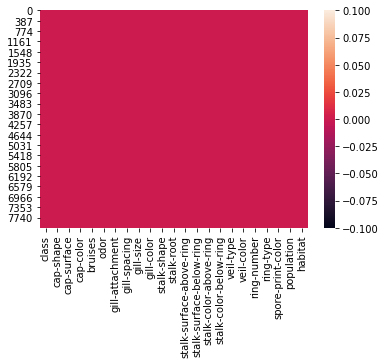

In [106]:
sns.heatmap(mu.isnull())

In [107]:
mu.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [108]:
mu['class'].unique()

array(['p', 'e'], dtype=object)

p=posinous,e= edible

In [109]:
# Changing class values to "1" and "0"s.
mu["class"] = [1 if i == "p" else 0 for i in mu["class"]]

# Dropping "veil-type" column.
mu.drop("veil-type",axis=1,inplace=True)

In [110]:
for column in mu.drop(["class"], axis=1).columns:
    value = 0
    step = 1/(len(mu[column].unique())-1)
    for i in mu[column].unique():
        mu[column] = [value if letter == i else letter for letter in mu[column]]
        value += step

In [111]:
mu.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000000
1,0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125,0.2,0.166667
2,0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125,0.2,0.333333
3,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000000
4,0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.125,0.4,0.166667


In [112]:
mu_cor=mu.corr()
mu_cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.112110,-0.169663,0.042028,0.501530,0.582015,-0.129200,-0.348387,-0.540024,0.412869,...,0.552044,0.532452,0.225294,0.098476,-0.120766,-0.152261,0.556515,0.560715,0.155254,0.191297
cap-shape,0.112110,1.000000,-0.057205,0.001839,0.120509,0.175229,0.040082,-0.043906,-0.151921,0.218627,...,0.079050,0.074161,0.073171,0.056450,0.042988,0.058422,0.099599,0.219476,0.139616,0.169343
cap-surface,-0.169663,-0.057205,1.000000,0.016133,-0.047265,-0.106147,-0.186157,0.029686,0.267029,-0.266708,...,0.080111,0.090350,0.080218,0.092631,-0.171918,-0.074779,0.107866,-0.283378,0.185359,-0.089972
cap-color,0.042028,0.001839,0.016133,1.000000,-0.065879,0.115960,-0.163457,-0.012795,0.015113,0.023458,...,-0.020976,-0.042124,-0.063978,-0.065686,-0.172176,0.184474,0.040785,0.055050,0.070150,0.003142
bruises,0.501530,0.120509,-0.047265,-0.065879,1.000000,0.588456,0.137359,0.299473,-0.369596,0.325408,...,0.573538,0.530214,0.267325,0.208451,0.125606,-0.014367,0.685119,0.543409,-0.008293,0.185130
odor,0.582015,0.175229,-0.106147,0.115960,0.588456,1.000000,-0.016816,-0.155748,-0.444492,0.599497,...,0.394828,0.353683,0.214888,0.101501,-0.056362,-0.009788,0.460625,0.563857,0.277777,0.449061
gill-attachment,-0.129200,0.040082,-0.186157,-0.163457,0.137359,-0.016816,1.000000,-0.071489,0.108984,0.184927,...,-0.087714,-0.100591,0.514289,0.595280,0.842230,0.049642,-0.073149,0.296461,0.164873,0.296916
gill-spacing,-0.348387,-0.043906,0.029686,-0.012795,0.299473,-0.155748,-0.071489,1.000000,0.108333,-0.274645,...,-0.054077,-0.112643,-0.309026,-0.233907,-0.034235,0.206233,-0.038015,-0.173491,-0.474326,-0.341360
gill-size,-0.540024,-0.151921,0.267029,0.015113,-0.369596,-0.444492,0.108984,0.108333,1.000000,-0.518717,...,-0.052806,-0.049072,0.186706,0.226610,0.074866,0.190112,-0.071459,-0.355811,-0.041683,-0.343122
gill-color,0.412869,0.218627,-0.266708,0.023458,0.325408,0.599497,0.184927,-0.274645,-0.518717,1.000000,...,0.154243,0.146393,0.188830,0.115547,0.169267,0.016427,0.181942,0.586547,0.293919,0.557094


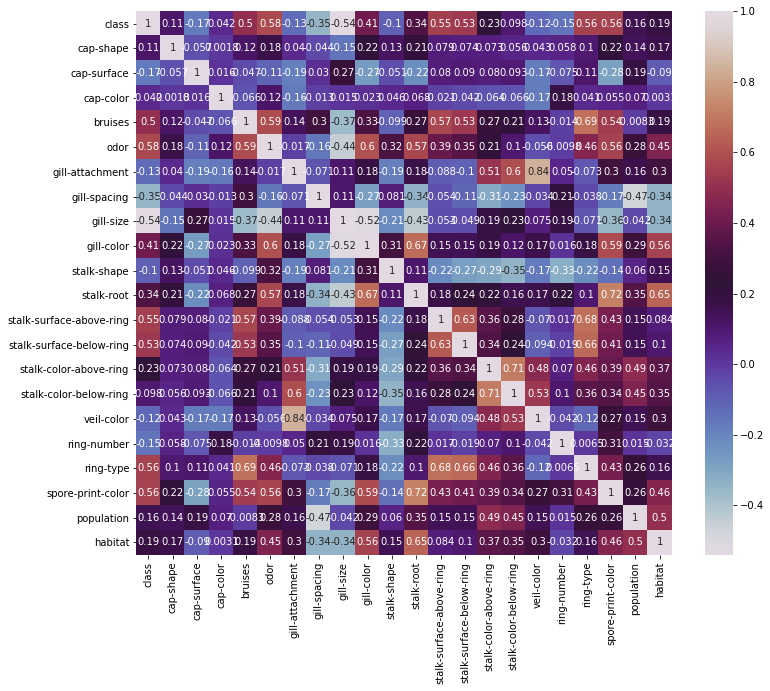

In [113]:
plt.figure(figsize=(12,10))
sns.heatmap(mu_cor,cmap='twilight',annot=True)

In [114]:
from scipy.stats import zscore
z=np.abs(zscore(mu))
z

array([[1.0366127 , 1.03067919, 1.25332348, ..., 1.26333897, 1.94613652,
        1.72783347],
       [0.96468045, 1.03067919, 1.25332348, ..., 0.68932522, 1.22208389,
        1.10957593],
       [0.96468045, 0.40130173, 1.25332348, ..., 0.68932522, 1.22208389,
        0.4913184 ],
       ...,
       [0.96468045, 0.8574532 , 1.25332348, ..., 3.32877101, 1.67412659,
        1.98171175],
       [1.0366127 , 1.48683066, 0.03619019, ..., 1.03271602, 0.22602135,
        1.98171175],
       [0.96468045, 1.03067919, 1.25332348, ..., 2.18074351, 1.67412659,
        1.98171175]])

In [115]:
Threshold=3
print(np.where(z>3))

(array([3984, 4106, 4165, ..., 8123, 8123, 8123], dtype=int64), array([17, 17,  3, ..., 14, 15, 16], dtype=int64))


In [116]:
z[3984][17]

3.151107152432545

In [117]:
mu_new=mu[(z<3).all(axis=1)]
mu_new

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.00,0.000,0.0,0.000000
1,0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.00,0.125,0.2,0.166667
2,0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.00,0.125,0.2,0.333333
3,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.00,0.000,0.0,0.000000
4,0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.25,0.125,0.4,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,1,0.8,0.333333,0.444444,1.0,0.750,0.0,0.0,0.0,0.727273,...,0.666667,1.0,0.25,0.125,0.0,0.0,0.25,0.500,0.6,0.500000
8116,1,0.8,0.333333,0.000000,1.0,0.875,0.0,0.0,0.0,0.727273,...,0.000000,1.0,0.25,0.000,0.0,0.0,0.25,0.500,0.6,1.000000
8117,1,0.8,0.000000,0.444444,1.0,0.750,0.0,0.0,0.0,0.727273,...,0.666667,0.0,0.25,0.000,0.0,0.0,0.25,0.500,0.6,0.500000
8118,1,0.8,0.333333,0.000000,1.0,0.500,0.0,0.0,0.0,0.727273,...,0.666667,0.0,0.25,0.000,0.0,0.0,0.25,0.500,0.6,0.500000


In [118]:
print(mu.shape,mu_new.shape)

(8124, 22) (7248, 22)


In [119]:
mu=mu_new
mu

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.00,0.000,0.0,0.000000
1,0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.00,0.125,0.2,0.166667
2,0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.00,0.125,0.2,0.333333
3,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.00,0.000,0.0,0.000000
4,0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.25,0.125,0.4,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,1,0.8,0.333333,0.444444,1.0,0.750,0.0,0.0,0.0,0.727273,...,0.666667,1.0,0.25,0.125,0.0,0.0,0.25,0.500,0.6,0.500000
8116,1,0.8,0.333333,0.000000,1.0,0.875,0.0,0.0,0.0,0.727273,...,0.000000,1.0,0.25,0.000,0.0,0.0,0.25,0.500,0.6,1.000000
8117,1,0.8,0.000000,0.444444,1.0,0.750,0.0,0.0,0.0,0.727273,...,0.666667,0.0,0.25,0.000,0.0,0.0,0.25,0.500,0.6,0.500000
8118,1,0.8,0.333333,0.000000,1.0,0.500,0.0,0.0,0.0,0.727273,...,0.666667,0.0,0.25,0.000,0.0,0.0,0.25,0.500,0.6,0.500000


In [120]:
x=mu.iloc[:,1:22]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.00,0.000,0.0,0.000000
1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.00,0.125,0.2,0.166667
2,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.00,0.125,0.2,0.333333
3,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.00,0.000,0.0,0.000000
4,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,...,0.000000,0.0,0.00,0.000,0.0,0.0,0.25,0.125,0.4,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,0.8,0.333333,0.444444,1.0,0.750,0.0,0.0,0.0,0.727273,1.0,...,0.666667,1.0,0.25,0.125,0.0,0.0,0.25,0.500,0.6,0.500000
8116,0.8,0.333333,0.000000,1.0,0.875,0.0,0.0,0.0,0.727273,1.0,...,0.000000,1.0,0.25,0.000,0.0,0.0,0.25,0.500,0.6,1.000000
8117,0.8,0.000000,0.444444,1.0,0.750,0.0,0.0,0.0,0.727273,1.0,...,0.666667,0.0,0.25,0.000,0.0,0.0,0.25,0.500,0.6,0.500000
8118,0.8,0.333333,0.000000,1.0,0.500,0.0,0.0,0.0,0.727273,1.0,...,0.666667,0.0,0.25,0.000,0.0,0.0,0.25,0.500,0.6,0.500000


In [121]:
y=mu.iloc[:,0]
y

0       1
1       0
2       0
3       1
4       0
       ..
8113    1
8116    1
8117    1
8118    1
8122    1
Name: class, Length: 7248, dtype: int64

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [123]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(5073, 21) (2175, 21)
(5073,) (2175,)


In [126]:
lg=LogisticRegression()

In [127]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))
print('classification report:',classification_report(y_test,pred))

Accuracy score: 0.9783908045977011
confusion matrix: [[1014   37]
 [  10 1114]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1051
           1       0.97      0.99      0.98      1124

    accuracy                           0.98      2175
   macro avg       0.98      0.98      0.98      2175
weighted avg       0.98      0.98      0.98      2175



In [128]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
1.0
[[1051    0]
 [   0 1124]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1051
           1       1.00      1.00      1.00      1124

    accuracy                           1.00      2175
   macro avg       1.00      1.00      1.00      2175
weighted avg       1.00      1.00      1.00      2175



Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probabi

In [130]:
from sklearn.model_selection import cross_val_score
mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.70551724 0.96551724 0.8262069  1.         0.97101449]
0.8936511744127935
0.11171660099069139


In [131]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.82344828 1.         0.99586207 1.         0.96135266]
0.9561326003664835
0.06791098164049057


In [132]:
from sklearn.model_selection import GridSearchCV

In [134]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
grid_param={
    'criterion': ['gini','entropy']
}
gd_sr=GridSearchCV(estimator=dtc,
                   param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)
gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.9613770257728278


In [145]:
from joblib import dump,load
dump(mu,'Mushroom_project.joblib')

['Mushroom_project.joblib']